# Статистический анализ данных / Python
## Задание 2

**Правила:**

* Дедлайн **24 ноября 23:59**.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[MADE19] Фамилия Имя - задание 2"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов), которую можно сделать с помощью печати в файл через инструменты браузера.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. 
* Разделяйте код вычислений и отрисовки графиков. Так будет удобнее вам и проверяющим.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

---------------

### Задача 1. (5 баллов)
В этой задаче нужно визуализировать доверительные интервалы для выборок из различных распределений в модели нормального распределения. 
Чтобы не плодить код, напишите следующую функцию.

In [2]:
def draw_confidence_interval(
        left,  # левая граница интервала
        right,  # правая граница интервала
        estimation=None,  # если задана, то рисуется график оценки
        sample=None,  # если задано, то рисуются точки выборки
        ylim=(None, None)  # ограничение по оси y
    ):
    
    n = np.arange(1, len(left)+1)
    
    plt.figure(figsize=(15, 8))
    
    plt.fill_between(n, right, left, alpha=0.15)
    
    if estimation is not None:
        plt.plot(n, estimation, color='red',
                 linewidth=2.5, label='estimation $\hat{\\theta}$')
    
    if sample is not None:
        plt.scatter(n, sample, alpha=0.2, s=40, label='sample')
    
    if (ylim[0] is not None) or (ylim[1] is not None):
        plt.ylim(ylim)
    
    plt.legend()
    plt.xlabel('n')

Рассмотрим следующие ситуации:

1. Выборка из распределения $\mathcal{N}(0, 1)$; точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$.

2. Выборка из распределения $\mathcal{N}(0, 1)$; асимптотический доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$.

3. Выборка из распределения Коши; точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$.

Для каждой ситуации из перечисленных выше сгенерируйте выборку $X_1, ... X_{100}$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок вида $X_1, ... X_i$, $1 \le i \le 100$.

Постройте графики зависимости верхних и нижних границ интервала от размера выборки, используя написанную функцию. Нужно нанести на график точки выборки.
Для вычисления квантилей у каждого распределения из `scipy.stats` используйте функцию `ppf`.


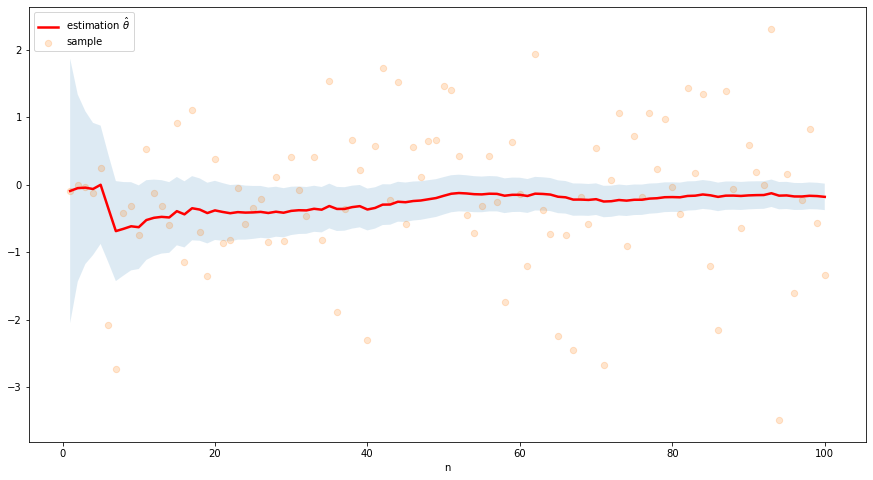

In [3]:
# 1. Код для построения точного доверительного интервала для выборки из N(0, 1)
# в параметрической модели N(theta, 1)
size = 100
alpha = 0.95
sigma = 1

n = np.arange(1, size+1)

sample = sps.norm().rvs(size=size)
theta_hat = sample.cumsum() / n

z = sps.norm().ppf((1+alpha)/2)

left = theta_hat - z * sigma / np.sqrt(n)
right = theta_hat + z * sigma / np.sqrt(n)
draw_confidence_interval(left, right, estimation=theta_hat,
                         sample=sample)

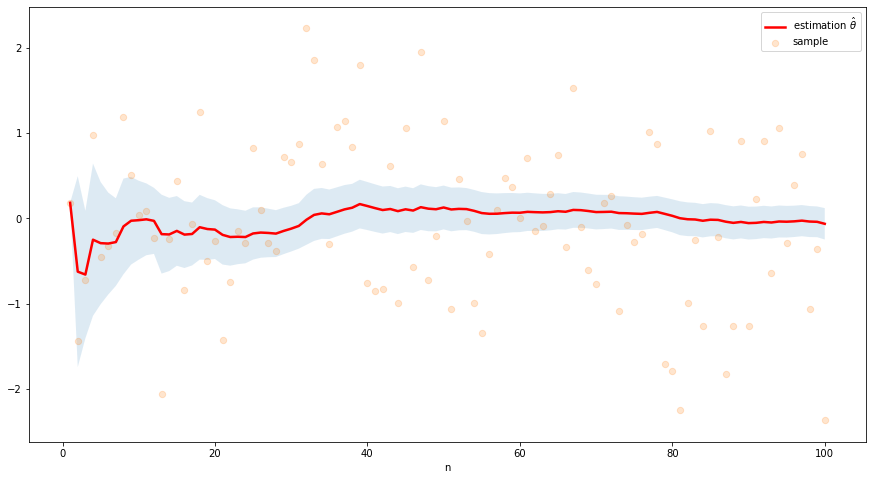

In [4]:
# 2. Код для построения асимптотического доверительного интервала для выборки из N(0, 1)
# в параметрической модели N(theta, sigma)
n = np.arange(1, size+1)

sample = sps.norm().rvs(size=size)
theta_hat = sample.cumsum() / n
sigma_hat = np.array([sample[:i].std() for i in n])

z = sps.norm().ppf((1+alpha)/2)

left = theta_hat - z * sigma_hat / np.sqrt(n)
right = theta_hat + z * sigma_hat / np.sqrt(n)
draw_confidence_interval(left, right, estimation=theta_hat,
                         sample=sample)

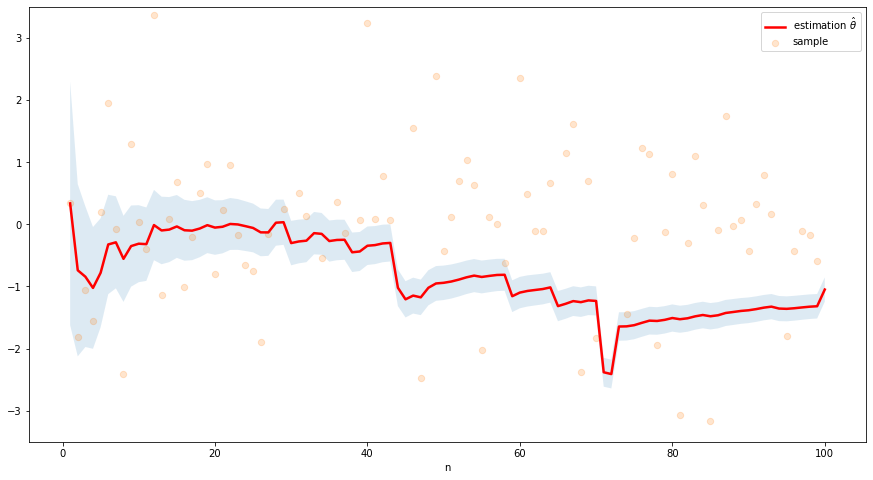

In [14]:
# Код для построения точного доверительного интервала для выборки из распределения Коши
# в параметрической модели N(theta, 1)
sample = sps.cauchy().rvs(size=size)
theta_hat = sample.cumsum() / n

z = sps.norm().ppf((1+alpha)/2)

left = theta_hat - z * sigma / np.sqrt(n)
right = theta_hat + z * sigma / np.sqrt(n)
draw_confidence_interval(left, right, estimation=theta_hat,
                         sample=sample, ylim=(-3.5, 3.5))

**Вывод:** Точный и асимптотический доверительный интервал в первом и втором случае включает истинное значение $\theta$ даже при небольших значениях n. Оценка $\hat{\theta}$ сходится к истинному значению при росте n, а доверительный интервал при этом сужается.

В третьем случае $\hat{\theta}$ не сходится, т.к. наша параметрическая модель не подходит для распределения Коши.

---------------

### Задача 2. (5 баллов)

Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine"> wine dataset </a> и выберите произвольные 3 произвольных
столбца с действительными числами, а также столбцы `Total phenols` и `Alcohol`. 

С помощью `seaborn.PairGrid` постройте таблицу графиков,
состоящую из
* одномерных ядерных оценок плотности по диагонали;
* двумерных ядерных оценок плотности ниже диагонали;
* scatter-plot выше диагонали (`plt.scatter`)


При возникновении затруднений посмотрите обучающий ноутбук по seaborn .

In [6]:
df = pd.read_csv('wine.data',
                 names=['class_id', 'alcohol', 'malic_acid',
                        'ash', 'alcalinity_of_ash', 'magnesium',
                        'total_phenols', 'flavanoids',
                        'nonflavanoid_phenols', 'proanthocyanins',
                        'color_intensity', 'hue',
                        'od280/od315_of_diluted_wines', 'proline'])

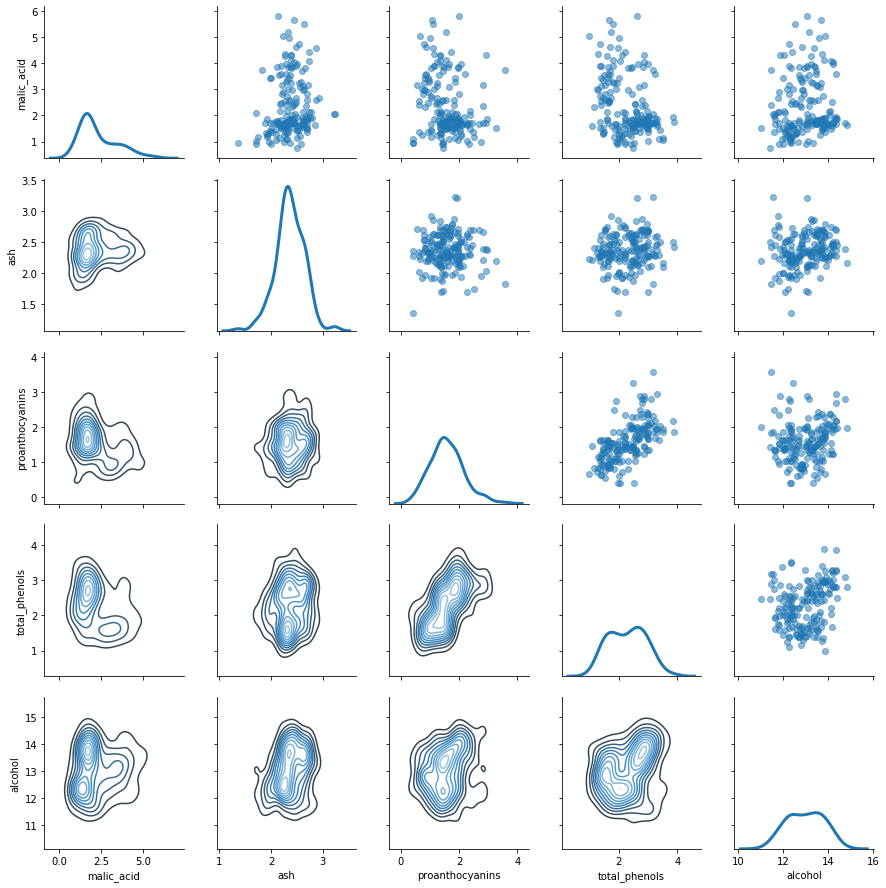

In [8]:
selected_features = ['malic_acid', 'ash', 'proanthocyanins', 'total_phenols', 'alcohol']
g = sns.PairGrid(df[selected_features])
g = g.map_upper(plt.scatter, alpha=0.5)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.kdeplot, lw=3)

Какие графики более наглядны: ядерные оценки плотности или scatter plots? 


Что можно сказать про распределения значений величин? С чем это может быть связано? (обратите внимание на пики)

**Ответ:** ядерные оценки плотности более наглядны (особенно, если смотреть сразу на одномерные и двумерные ядерные оценки плотности) по сравнению со scatter plots. 

Распределения признаков `Ash` и `Proanthocyanins` похожи на нормальные. Распределения признаков `Malic acid`, `Total phenols`, `Alcohol` похожи на сумму нескольких нормальных распределений (т.к. они имеют больше одного пика). Это может быть связано с тем, что разные сорта вин образуют кластеры, каждый из которых имеет свое нормальное распределения с отличающимися параметрами.

Пока что мы строили графики для значений признаков вин вне зависимости от их сорта (колонка `Class`). 
Это нужно для того, чтобы найти основные свойства распределения: какие значения оно принимает чаще всего, сколько пиковых значений у оценки плотности, насколько велик разброс значений и тд. 

Однако сейчас мы не знаем, как влияет сорт вина на значения признаков и стоит ли им пренебрегать.
Проведем небольшое иследование

Постройте графики одномерных оценок плотности для выбранных признаков, которые нарисуйте в два столбца.

В каждой строке:

* На первом графике нарисуйте три оценки плотности признака для вин каждого типа.

* На втором графике нарисуйте график ядерной оценки плотности для всех значений признака, которые есть в датасете (то есть независимо от типа вина)


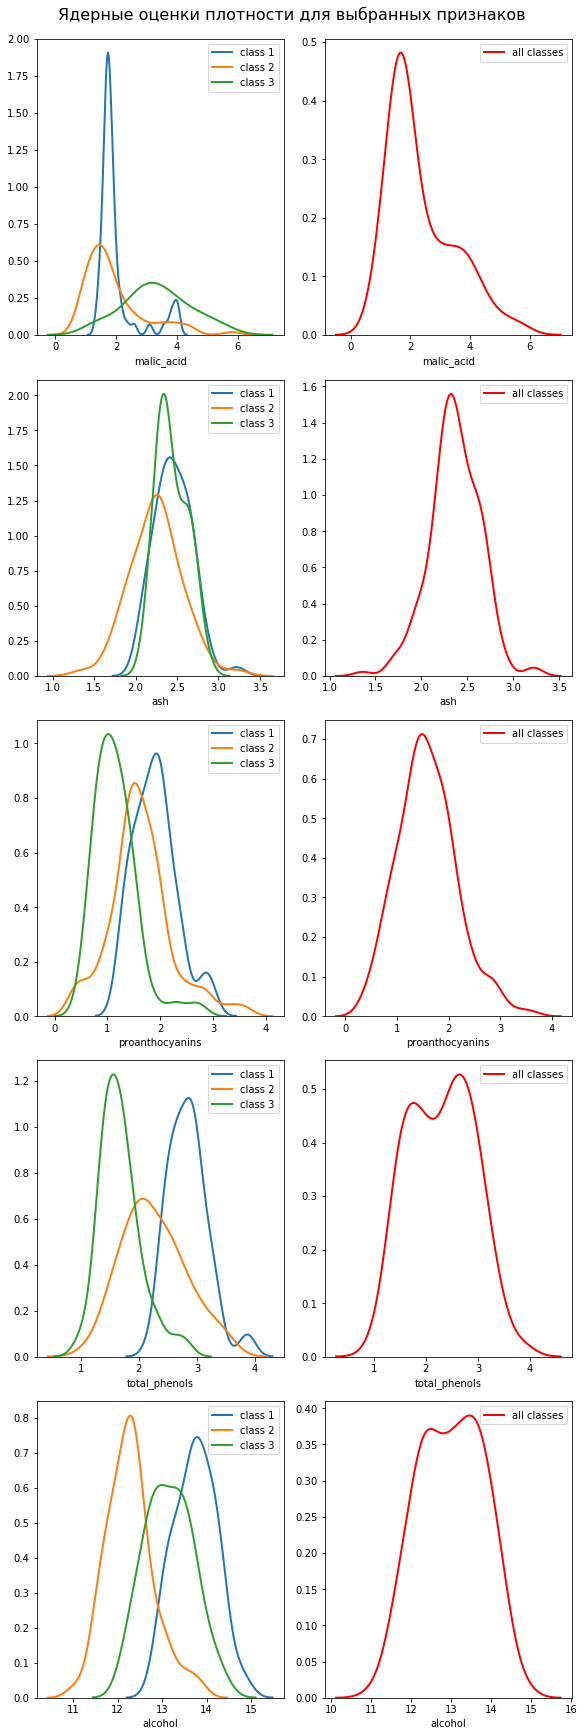

In [9]:
fig, axs = plt.subplots(len(selected_features), 2, figsize=(8, 24), constrained_layout=True)
fig.suptitle('Ядерные оценки плотности для выбранных признаков', fontsize=16)

for i, (feature) in enumerate(selected_features):
    for c in df.class_id.unique():
        sns.kdeplot(data=df[df.class_id == c][feature], lw=2, label='class ' + str(c), ax=axs[i, 0])
    sns.kdeplot(data=df[feature], lw=2, label='all classes', ax=axs[i, 1], color='red')
    for j in range(2):
        axs[i, j].set_xlabel(feature)

Сделайте выводы о влиянии класса вина на вид графиков и по всей задаче

**Вывод:** Наличие нескольких пиков на графиках ядерной оценки плотности, построенной для всех сортов вина одновременно у признаков `Total phenols` и `Alcohol`, действительно связано с тем, что у каждого сорта вина свое нормальное распределение со своими параметрами. Это видно по графикам ядерной оценки плотности для каждого отдельного сорта вина.

У признака `Ash` плотности распределений у первого и третьего сортов вина сильно накладываются друг на друга. Следовательно, разделить эти сорта по этому признаку будет сложно.

По графикам ядерной оценки плотности можно определить наилучшие признаки для классификации сортов вин.